## 404.左叶子之和

给定二叉树的根节点 root ，返回所有左叶子之和。

示例 1：

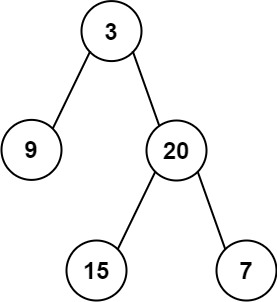

输入: root = [3,9,20,null,null,15,7] 

输出: 24 

解释: 在这个二叉树中，有两个左叶子，分别是 9 和 15，所以返回 24


示例 2:

输入: root = [1]

输出: 0


## 知识点: 判断左叶子的逻辑

该节点的 左节点 不为空
该节点的 左节点 的 左节点 和 右节点 都为空，

if (node->left != NULL && node->left->left == NULL && node->left->right == NULL) {
    左叶子节点处理逻辑
}

### 递归法

后序遍历（左右中）



递归三部曲:

1. 确定递归函数的参数和返回值



2. 确定终止条件

if (root == NULL) return 0;


3. 确定单层递归的逻辑

int leftValue = sumOfLeftLeaves(root -> left);





In [3]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def sumOfLeftLeaves(self, root):
        if root is None:
            return 0
        if root.left is None and root.right is None:
            return 0
        
        # 左
        leftValue = self.sumOfLeftLeaves(root.left)

        # 左子树是左叶子的情况
        if root.left and not root.left.left and not root.left.right:
            leftValue = root.left.val
        
        # 右
        rightValue = self.sumOfLeftLeaves(root.right)

        # 中
        sum_val = leftValue + rightValue

        return sum_val

In [4]:
# 迭代法

class Solution:
    def sumOfLeftLeaves(self, root):
        if root is None:
            return 0
        st = [root]
        result = 0
        while st:
            node = st.pop()
            if node.left and node.left.left is None and node.left.right is None:
                result += node.left.val
            if node.right:
                st.append(node.right)
            if node.left:
                st.append(node.left)
        return result

## 513.找树左下角的值

给定一个二叉树的 根节点 root，请找出该二叉树的 最底层 最左边 节点的值。

假设二叉树中至少有一个节点。

 
示例 1:

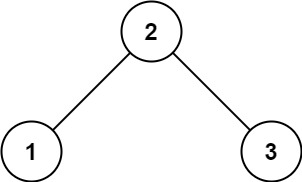

输入: root = [2,1,3]

输出: 1



示例 2:

输入: [1,2,3,4,null,5,6,null,null,7]

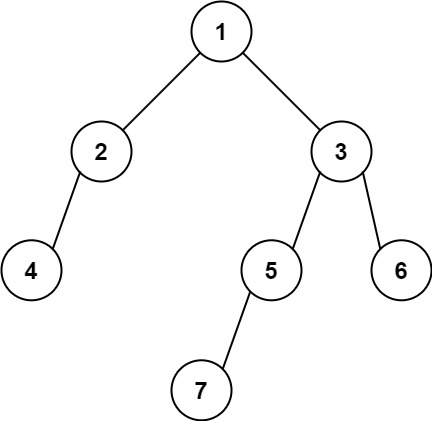

输出: 7
 

提示:

二叉树的节点个数的范围是 [1,104]

-231 <= Node.val <= 231 - 1 

# 递归法

# 确定递归函数的参数和返回值

参数: 根节点, 当前最长深度,
返回值: 不需要
保存变量: 最大深度, 最大值

# 确定终止条件

什么时候终止: 遇到叶子节点的时候
终止时做什么: 统计最大深度


# 确定单层递归的逻辑

用回溯


In [5]:
class Solution:
    def findBottomLeftValue(self, root: TreeNode) -> int:
        self.max_depth = float('-inf')
        self.result = None
        self.traversal(root, 0)
        return self.result
    
    def traversal(self, node, depth):

        # 前序遍历 - 中-左-右

        # 终止条件,遇到子节点
        # 这是 “中”
        if not node.left and not node.right:
            # 如果满足更新结果条件, 更新result
            if depth > self.max_depth:
                self.max_depth = depth
                self.result = node.val
            return

        if node.left:
            depth += 1
            self.traversal(node.left, depth) # 左
            depth -= 1

        if node.right:
            depth += 1
            self.traversal(node.right, depth) # 右
            depth -= 1

In [6]:
# 迭代法: 层序遍历

from collections import deque
class Solution:
    def findBottomLeftValue(self, root):
        if root is None:
            return 0
        
        # 用deque模拟stack, FIFO
        queue = deque()
        queue.append(root)
        result = 0
        while queue:
            size = len(queue)
            for i in range(size):
                node = queue.popleft()
                if i == 0:
                    result = node.val
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
        return result

# 112. 路径总和

## 题目描述

给你二叉树的根节点 `root` 和一个表示目标和的整数 `targetSum`。判断该树中是否存在 **根节点到叶子节点** 的路径，这条路径上所有节点值相加等于目标和 `targetSum`。如果存在，返回 `true`；否则，返回 `false`。

**叶子节点** 是指没有子节点的节点。

---

## 示例

### 示例 1

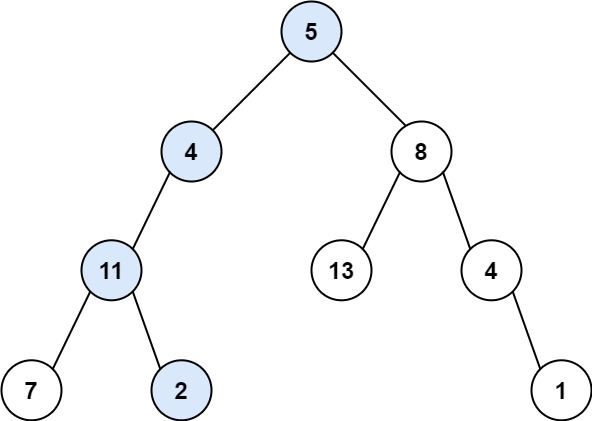

#### 输入：
```
root = [5,4,8,11,null,13,4,7,2,null,null,null,1]
targetSum = 22
```
#### 输出：
```
true
```
#### 解释：
等于目标和的根节点到叶子节点路径如图所示。

---

### 示例 2

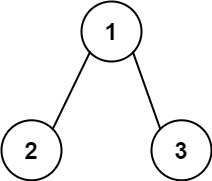

#### 输入：
```
root = [1,2,3]
targetSum = 5
```
#### 输出：
```
false
```
#### 解释：
树中存在两条根节点到叶子节点的路径：
- `(1 --> 2)`：和为 `3`
- `(1 --> 3)`：和为 `4`
不存在 `sum = 5` 的根节点到叶子节点的路径。

---

### 示例 3

#### 输入：
```
root = []
targetSum = 0
```
#### 输出：
```
false
```
#### 解释：
由于树是空的，所以不存在根节点到叶子节点的路径。

---

## 提示：
- 树中节点的数目在范围 `[0, 5000]` 内。
- `-1000 <= Node.val <= 1000`
- `-1000 <= targetSum <= 1000`

# 递归 + 回溯

# 深度优先遍历

1. 确定递归函数的参数和返回类型

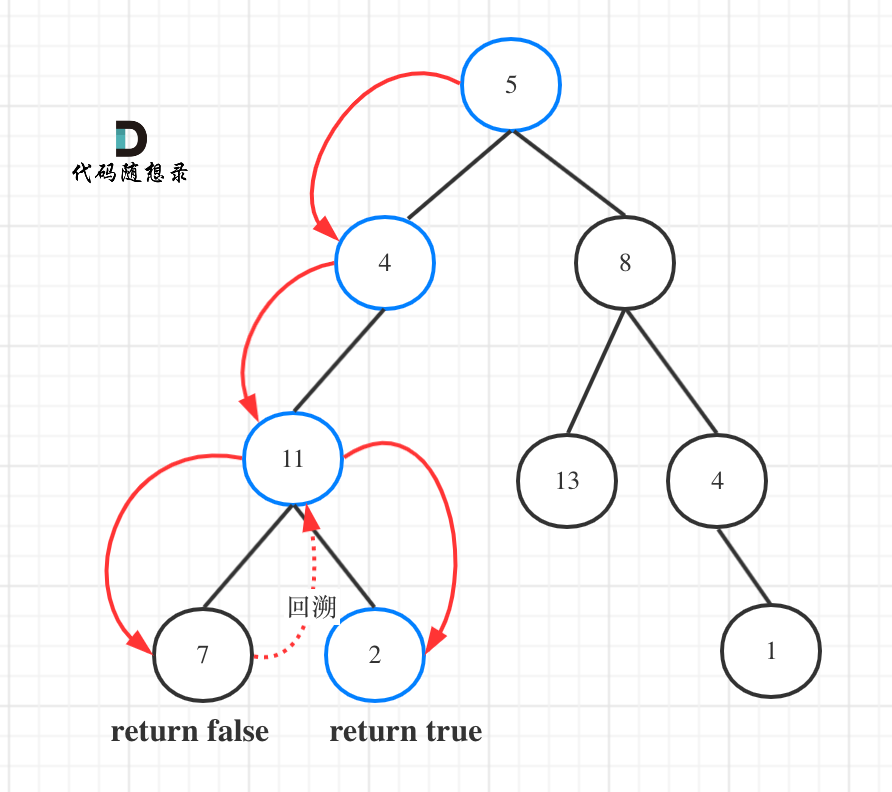

In [9]:

from typing import Optional

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def traversal(self, cur: TreeNode, count: int) -> bool:

        # 中
        if not cur.left and not cur.right and count == 0: # 遇到叶子节点，并且计数为0
            return True
        if not cur.left and not cur.right: # 遇到叶子节点直接返回
            return False
        
        if cur.left: # 左
            count -= cur.left.val
            if self.traversal(cur.left, count): # 递归，处理节点
                return True
            count += cur.left.val # 回溯，撤销处理结果
            
        if cur.right: # 右
            count -= cur.right.val
            if self.traversal(cur.right, count): # 递归，处理节点
                return True
            count += cur.right.val # 回溯，撤销处理结果
            
        return False
    
    def hasPathSum(self, root: Optional[TreeNode], targetSum: int) -> bool:
        if root is None:
            return False
        return self.traversal(root, targetSum - root.val) 

In [10]:
class Solution:
    def hasPathSum(self, root: Optional[TreeNode], targetSum: int) -> bool:
        if not root:
            return False
        # 此时栈里要放的是pair<节点指针，路径数值>
        st = [(root, root.val)]
        while st:
            node, path_sum = st.pop()
            # 如果该节点是叶子节点了，同时该节点的路径数值等于sum，那么就返回true
            if not node.left and not node.right and path_sum == sum:
                return True
            # 右节点，压进去一个节点的时候，将该节点的路径数值也记录下来
            if node.right:
                st.append((node.right, path_sum + node.right.val))
            # 左节点，压进去一个节点的时候，将该节点的路径数值也记录下来
            if node.left:
                st.append((node.left, path_sum + node.left.val))
        return False

# 106. 从中序与后序遍历序列构造二叉树

## 题目描述

给定两个整数数组 `inorder` 和 `postorder`，其中 `inorder` 是二叉树的中序遍历，`postorder` 是同一棵树的后序遍历，请你构造并返回这颗二叉树。

## 示例

### 示例 1:

#### 输入：
```
inorder = [9,3,15,20,7]
postorder = [9,15,7,20,3]
```

#### 输出：
```
[3,9,20,null,null,15,7]
```

### 示例 2:

#### 输入：
```
inorder = [-1]
postorder = [-1]
```

#### 输出：
```
[-1]
```

## 提示

- `1 <= inorder.length <= 3000`
- `postorder.length == inorder.length`
- `-3000 <= inorder[i], postorder[i] <= 3000`
- `inorder` 和 `postorder` 都由 **不同** 的值组成
- `postorder` 中的每一个值都在 `inorder` 中
- `inorder` 保证是树的 **中序遍历**
- `postorder` 保证是树的 **后序遍历**

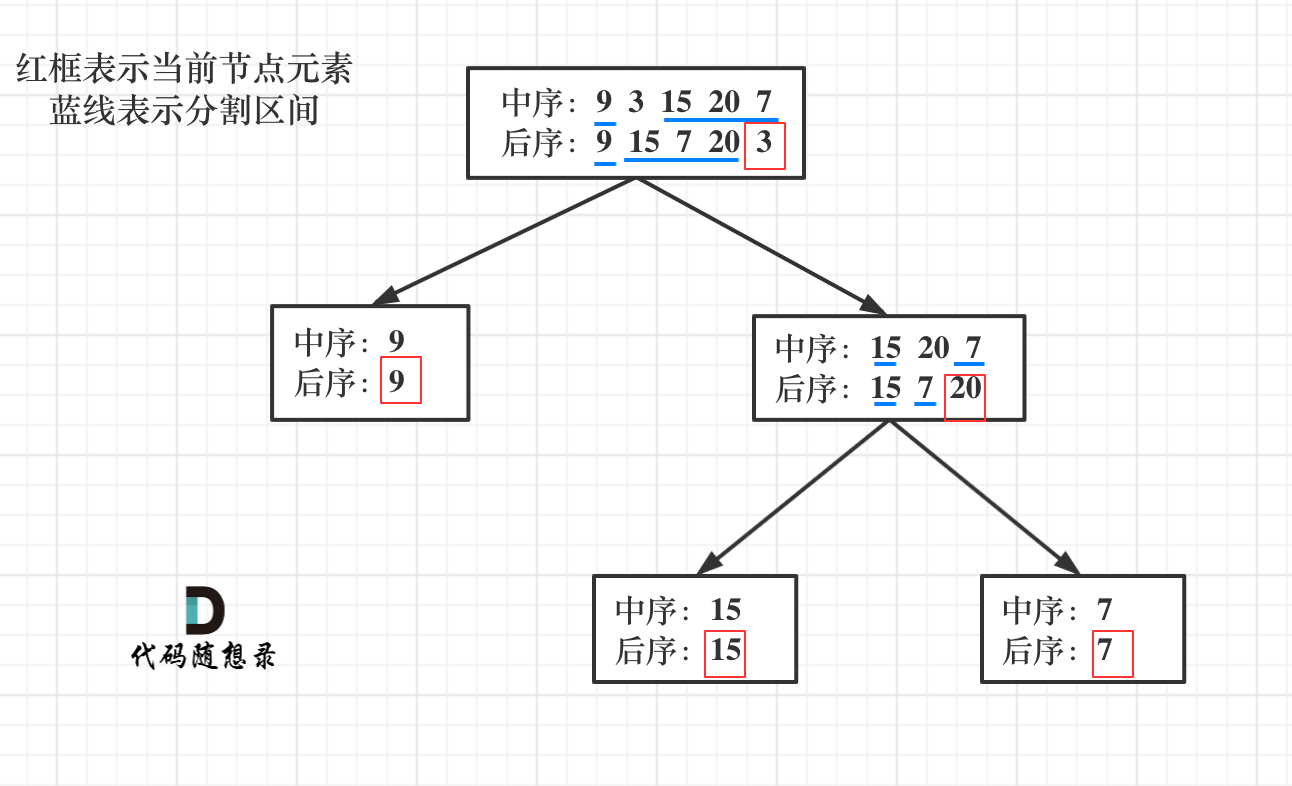

以 后序数组的最后一个元素为切割点，先切中序数组，根据中序数组，反过来再切后序数组。

第一步：如果数组大小为零的话，说明是空节点了。

第二步：如果不为空，那么取后序数组最后一个元素作为节点元素。

第三步：找到后序数组最后一个元素在中序数组的位置，作为切割点

第四步：切割中序数组，切成中序左数组和中序右数组 （顺序别搞反了，一定是先切中序数组）

第五步：切割后序数组，切成后序左数组和后序右数组

第六步：递归处理左区间和右区间

In [ ]:
# 105.从前序与中序遍历序列构造二叉树

from typing import List
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> TreeNode:
        # 第一步: 特殊情况讨论: 树为空. 或者说是递归终止条件
        if not preorder:
            return None

        # 第二步: 前序遍历的第一个就是当前的中间节点.
        root_val = preorder[0]
        root = TreeNode(root_val)

        # 第三步: 找切割点.
        separator_idx = inorder.index(root_val)

        # 第四步: 切割inorder数组. 得到inorder数组的左,右半边.
        inorder_left = inorder[:separator_idx]
        inorder_right = inorder[separator_idx + 1:]

        # 第五步: 切割preorder数组. 得到preorder数组的左,右半边.
        # ⭐️ 重点1: 中序数组大小一定跟前序数组大小是相同的.
        preorder_left = preorder[1:1 + len(inorder_left)] # @note 重点在这句
        preorder_right = preorder[1 + len(inorder_left):] # @note 重点在这句

        # 第六步: 递归
        root.left = self.buildTree(preorder_left, inorder_left)
        root.right = self.buildTree(preorder_right, inorder_right)
        # 第七步: 返回答案
        return root

In [ ]:
# 106.从中序与后序遍历序列构造二叉树

class Solution:
    def buildTree(self, inorder: List[int], postorder: List[int]) -> TreeNode:
        # 第一步: 特殊情况讨论: 树为空. (递归终止条件)
        if not postorder:
            return None

        # 第二步: 后序遍历的最后一个就是当前的中间节点.
        root_val = postorder[-1]
        root = TreeNode(root_val)

        # 第三步: 找切割点.
        separator_idx = inorder.index(root_val)

        # 第四步: 切割inorder数组. 得到inorder数组的左,右半边.
        inorder_left = inorder[:separator_idx]
        inorder_right = inorder[separator_idx + 1:]

        # 第五步: 切割postorder数组. 得到postorder数组的左,右半边.
        # ⭐️ 重点1: 中序数组大小一定跟后序数组大小是相同的.
        postorder_left = postorder[:len(inorder_left)]
        postorder_right = postorder[len(inorder_left): len(postorder) - 1]

        # 第六步: 递归
        root.left = self.buildTree(inorder_left, postorder_left)
        root.right = self.buildTree(inorder_right, postorder_right)
        
         # 第七步: 返回答案
        return root


# 654. 最大二叉树

## 题目描述

给定一个不重复的整数数组 `nums`，**最大二叉树** 可以用下面的算法从 `nums` 递归地构建：

1. 创建一个根节点，其值为 `nums` 中的最大值。
2. 递归地在最大值**左边**的子数组前缀上构建**左子树**。
3. 递归地在最大值**右边**的子数组后缀上构建**右子树**。

返回 `nums` 构建的 **最大二叉树**。

---

## 示例

### 示例 1：

#### 输入：
```
nums = [3,2,1,6,0,5]
```

#### 输出：
```
[6,3,5,null,2,0,null,null,1]
```

#### 解释：
递归调用如下所示：
- `[3,2,1,6,0,5]` 中的最大值是 `6`，左边部分是 `[3,2,1]`，右边部分是 `[0,5]`。
    - `[3,2,1]` 中的最大值是 `3`，左边部分是 `[]`，右边部分是 `[2,1]`。
        - 空数组，无子节点。
        - `[2,1]` 中的最大值是 `2`，左边部分是 `[]`，右边部分是 `[1]`。
            - 空数组，无子节点。
            - 只有一个元素，所以子节点是一个值为 `1` 的节点。
    - `[0,5]` 中的最大值是 `5`，左边部分是 `[0]`，右边部分是 `[]`。
        - 只有一个元素，所以子节点是一个值为 `0` 的节点。
        - 空数组，无子节点。

---

### 示例 2：

#### 输入：
```
nums = [3,2,1]
```

#### 输出：
```
[3,null,2,null,1]
```

---

## 提示

- `1 <= nums.length <= 1000`
- `0 <= nums[i] <= 1000`
- `nums` 中的所有整数 **互不相同**
- 
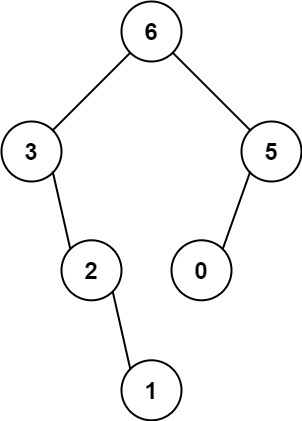

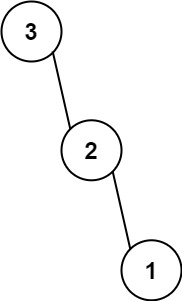



https://file1.kamacoder.com/i/algo/654.%E6%9C%80%E5%A4%A7%E4%BA%8C%E5%8F%89%E6%A0%91.gif


## 知识点: 构造树一般采用的是前序遍历，因为先构造中间节点，然后递归构造左子树和右子树。

递归思路:

确定递归函数的参数和返回值

参数传入的是存放元素的数组，返回该数组构造的二叉树的头结点，返回类型是指向节点的指针

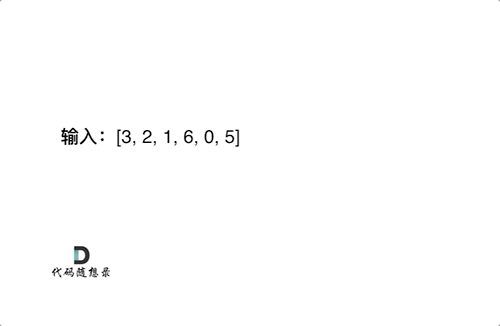

In [ ]:
# 我的笔记:
# 先找到最大值, 作为根节点

# 然后递归构建左右子树

from typing import List, Optional

class TreeNode:
    def __init__(self, val: int, left: 'Optional[TreeNode]' = None, right: 'Optional[TreeNode]' = None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def constructMaximumBinaryTree(self, nums: List[int]) -> TreeNode:
        # 边界：只有一个元素时直接返回
        if len(nums) == 1:
            return TreeNode(nums[0])

        # 使用内置函数找最大值和下标
        maxValue = max(nums)                # 最大值
        maxValueIndex = nums.index(maxValue)  # 最大值下标

        # 中: 创建根节点
        node = TreeNode(maxValue)

        # 左: 构造左子树
        if maxValueIndex > 0:
            node.left = self.constructMaximumBinaryTree(nums[:maxValueIndex])

        # 右: 构造右子树
        if maxValueIndex < len(nums) - 1:
            node.right = self.constructMaximumBinaryTree(nums[maxValueIndex+1:])

        return node